In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

from linear_regression import LinearRegression

In [3]:
df1 = pd.read_csv('../data1.csv')
df2 = pd.read_csv('../data2.csv')
df3 = pd.read_csv('../data3.csv')

In [3]:
# data1
x_data1 = df1['x1'].values.reshape(-1, 1)
y_data1 = df1['x2'].values

[1.08898963 2.0207883 ]


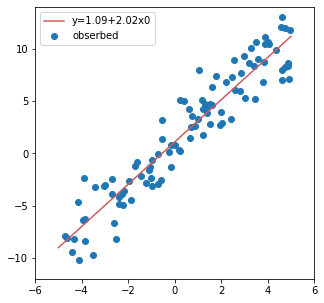

In [7]:
model = LinearRegression(digree=1)
X = df1['x1'].values.reshape(-1, 1)
y = df1['x2'].values
model.fit(X, y, regularization=True)
reg_eq_1 = model.get_equation()

w = model.coef
linex = np.linspace(-5, 5)
y_ = model.predict(linex.reshape(-1, 1))

print(w)

plt.figure(figsize=(5, 5))
plt.scatter(X, y, label='obserbed')
plt.plot(linex, y_, c='indianred', label=reg_eq_1)
# plt.title(w)
plt.xlim(-6, 6)
plt.ylim(-12, 14)
plt.legend()
plt.savefig('data1.png')

[1.09890375 2.02264742]


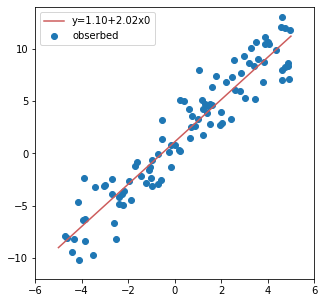

In [8]:
model = LinearRegression(digree=1)
X = df1['x1'].values.reshape(-1, 1)
y = df1['x2'].values
model.fit(X, y, regularization=False)
reg_eq_1 = model.get_equation()

w = model.coef
linex = np.linspace(-5, 5)
y_ = model.predict(linex.reshape(-1, 1))

print(w)

plt.figure(figsize=(5, 5))
plt.scatter(X, y, label='obserbed')
plt.plot(linex, y_, c='indianred', label=reg_eq_1)
# plt.title(w)
plt.xlim(-6, 6)
plt.ylim(-12, 14)
plt.legend()
plt.savefig('data1.png')

In [9]:
lams = [0, 1, 5, 10, 50, 100]

lam = 0: [ 1.17794642  2.35029597 -0.00639678 -0.02135915]
lam = 1: [ 1.15690404  2.33413097 -0.00517617 -0.02049074]
lam = 5: [ 1.08057424e+00  2.27122013e+00 -8.09354293e-04 -1.71006601e-02]
lam = 10: [ 0.99966608  2.19648787  0.00370462 -0.01305529]
lam = 50: [0.63977832 1.73056601 0.02186398 0.01243504]
lam = 100: [0.45021759 1.36388228 0.02964759 0.03266775]


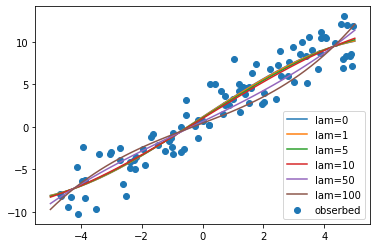

In [10]:
fig, ax = plt.subplots()
for lam in lams:
    model = LinearRegression(digree=3)
    X = df1['x1'].values.reshape(-1, 1)
    y = df1['x2'].values
    model.fit(X, y, regularization=lam, lam=lam)
    reg_eq_1 = model.get_equation()

    w = model.coef
    linex = np.linspace(-5, 5)
    y_ = model.predict(linex.reshape(-1, 1))

    print('lam = {}: {}'.format(lam, w))
    
    ax.plot(linex, y_, label='lam={}'.format(lam))

# ax.set_xlim([-6, 10])
# ax.set_ylim([-10, 20])
ax.scatter(x_data1, y_data1, label='obserbed')
ax.legend(loc=4)
ax.set(title="", xlabel="", ylabel="")
plt.savefig('var_dig_1.png')

In [26]:
# data2
x_data2 = df2['x1'].values.reshape(-1, 1)
y_data2 = df2['x2'].values
X_train, X_test, y_train, y_test = train_test_split(x_data2, y_data2, test_size=0.3, random_state=0)

In [40]:
mses_by_dig = []
w_by_digs = []
lams = list(range(1000))
digs = [1, 2, 3]

In [41]:
for dig in digs:
    model = LinearRegression(digree=dig)

    mses = []
    w = []
    for lam in lams:
        model.fit(X_train, y_train, regularization=lam, lam=lam)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)

        mses.append(mse)
        w.append(model.coef)
    mses_by_dig.append(mses)
    w_by_digs.append(w)

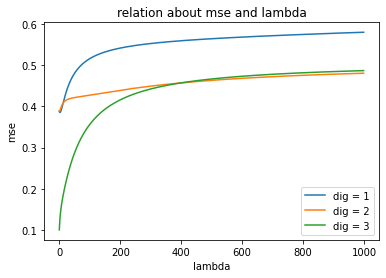

In [42]:
fig, ax = plt.subplots()
for i, mses in enumerate(mses_by_dig):
    ax.plot(lams, mses, label="dig = {}".format(digs[i]))

ax.legend(loc=4)
ax.set(title="relation about mse and lambda", xlabel="lambda", ylabel="mse")
plt.savefig('mse_lam_relation.png')
plt.show()